In [12]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina' # Optional

plt.style.use('physrev.mplstyle') # Set full path to physrev.mplstyle if the file is not in the same in directory as the notebook
plt.rcParams['figure.dpi'] = "300"

colors from https://xkcd.com/color/rgb/

# Function Definitions

In [13]:
def stab_to_pauli_pl(stab_list):
	temp_probs = np.repeat((1 - np.sum(stab_list)), 3)
	temp_probs += 2*stab_list
	temp_probs = np.append(temp_probs, (1+np.sum(stab_list)))
	return temp_probs/4

In [20]:
η = 0.9
γ = 0
D = 1
trace_2 = η**2 * ( 0.25 + (D*(1-D)))
trace_2 += 2 * (1-η)**2 * γ**4
trace_2 += 4 * η * (1-η) * γ**2 * np.sqrt(D*(1-D)) 
B = 4 * η * (1-η) * γ**2 * np.sqrt(D*(1-D)) 
B += 2 * (1-η)**2 * γ**4
B += η**2 * np.sqrt(D*(1-D))
B *= 2
c = η + ((1-η) * γ**2)
d = (2*η*np.sqrt(D*(1-D))) + ((1-η) * γ**2)
e = η*((2*D)-1)
C_A = η**2 * ( (D*(1-D)) - 0.25)

II_in = c**2 + d**2
stab_in =  np.array([ c**2 + d**2 ,
            -e**2,
            e**2
])
stab_in /= II_in

# X, Y, Z
II = 1 + (d/c)**2 + (2*d*B/(trace_2*c))
stab_out =  np.array([ (1 + (c/d)**2 + (2*c*B/(trace_2*d))) ,
            (e**2 * C_A/ trace_2),
            -(e**2 * C_A/ trace_2)
])
stab_out /= II

/var/folders/s9/whvhj6gs5cx001kw71n2wfqr0000gq/T/ipykernel_17702/2944522697.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  stab_out =  np.array([ (1 + (c/d)**2 + (2*c*B/(trace_2*d))) ,
/var/folders/s9/whvhj6gs5cx001kw71n2wfqr0000gq/T/ipykernel_17702/2944522697.py:25: RuntimeWarning: invalid value encountered in scalar divide
  stab_out =  np.array([ (1 + (c/d)**2 + (2*c*B/(trace_2*d))) ,


In [14]:
def pauli_err_fusion4(γ, η, D):
    trace_2 = η**2 * ( 0.25 + (D*(1-D)))
    trace_2 += 2 * (1-η)**2 * γ**4
    trace_2 += 4 * η * (1-η) * γ**2 * np.sqrt(D*(1-D)) 
    B = 4 * η * (1-η) * γ**2 * np.sqrt(D*(1-D)) 
    B += 2 * (1-η)**2 * γ**4
    B += η**2 * np.sqrt(D*(1-D))
    B *= 2
    c = η + ((1-η) * γ**2)
    d = (2*η*np.sqrt(D*(1-D))) + ((1-η) * γ**2)
    e = η*((2*D)-1)
    C_A = η**2 * ( (D*(1-D)) - 0.25)

    II_in = c**2 + d**2
    stab_in =  np.array([ c**2 + d**2 ,
                -e**2,
                e**2
    ])
    stab_in /= II_in

    # X, Y, Z
    II = 1 + (d/c)**2 + (2*d*B/(trace_2*c))
    stab_out =  np.array([ (1 + (c/d)**2 + (2*c*B/(trace_2*d))) ,
                (e**2 * C_A/ trace_2),
                -(e**2 * C_A/ trace_2)
    ])
    stab_out /= II


    px, py, pz, po = stab_to_pauli_pl(stab_in)
    p_oz = po + pz
    m_oz = po - pz
    p_xy = px + py
    m_xy = px - py
    Px, Py, Pz, Po = stab_to_pauli_pl(stab_out)
    P_oz = Po + Pz
    M_oz = Po - Pz
    P_xy = Px + Py
    M_xy = Px - Py

    po_ = ((p_oz*P_oz - p_xy*P_xy)/(p_oz**2 - p_xy**2)) + ((m_oz*M_oz - m_xy*M_xy)/(m_oz**2 - m_xy**2))
    pz_ = ((p_oz*P_oz - p_xy*P_xy)/(p_oz**2 - p_xy**2)) - ((m_oz*M_oz - m_xy*M_xy)/(m_oz**2 - m_xy**2))
    px_ = ((p_oz*P_xy - p_xy*P_oz)/(p_oz**2 - p_xy**2)) + ((m_oz*M_xy - m_xy*M_oz)/(m_oz**2 - m_xy**2))
    py_ = ((p_oz*P_xy - p_xy*P_oz)/(p_oz**2 - p_xy**2)) - ((m_oz*M_xy - m_xy*M_oz)/(m_oz**2 - m_xy**2))
    return (0.5 * np.array([px_, py_, pz_, po_]))

In [18]:
def pauli_err_fusion3(γ, η, ζ):
    N_1inv = ( η + (2 * (1-η) * γ**2) )**(-2)
    stab_in =  np.array([ (ζ*η**2 + (4* (1-η)**2 *γ**4))*N_1inv ,
                η**2 * (ζ) * N_1inv,
                η**2*N_1inv
    ])

    N_Tinv =  ( (32* (1-η)**2 *γ**4) + (16 * (1-η) * η * γ**2) + (η**2))**(-1)
    stab_out =  np.array([ (ζ**2*η**4*(N_Tinv) + (4* (1-η)**2 *γ**4))*N_1inv ,
                η**4 * (ζ**2) * N_1inv*N_Tinv,
                η**4*N_1inv*N_Tinv
    ])


    px, py, pz, po = stab_to_pauli_pl(stab_in)
    p_oz = po + pz
    m_oz = po - pz
    p_xy = px + py
    m_xy = px - py
    Px, Py, Pz, Po = stab_to_pauli_pl(stab_out)
    P_oz = Po + Pz
    M_oz = Po - Pz
    P_xy = Px + Py
    M_xy = Px - Py

    po_ = ((p_oz*P_oz - p_xy*P_xy)/(p_oz**2 - p_xy**2)) + ((m_oz*M_oz - m_xy*M_xy)/(m_oz**2 - m_xy**2))
    pz_ = ((p_oz*P_oz - p_xy*P_xy)/(p_oz**2 - p_xy**2)) - ((m_oz*M_oz - m_xy*M_xy)/(m_oz**2 - m_xy**2))
    px_ = ((p_oz*P_xy - p_xy*P_oz)/(p_oz**2 - p_xy**2)) + ((m_oz*M_xy - m_xy*M_oz)/(m_oz**2 - m_xy**2))
    py_ = ((p_oz*P_xy - p_xy*P_oz)/(p_oz**2 - p_xy**2)) - ((m_oz*M_xy - m_xy*M_oz)/(m_oz**2 - m_xy**2))
    return (0.5 * np.array([px_, py_, pz_, po_]))

In [19]:
pauli_err_fusion4(0, 1, 1)

/var/folders/s9/whvhj6gs5cx001kw71n2wfqr0000gq/T/ipykernel_17702/2291691310.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  stab_out =  np.array([ (1 + (c/d)**2 + (2*c*B/(trace_2*d))) ,
/var/folders/s9/whvhj6gs5cx001kw71n2wfqr0000gq/T/ipykernel_17702/2291691310.py:23: RuntimeWarning: invalid value encountered in scalar divide
  stab_out =  np.array([ (1 + (c/d)**2 + (2*c*B/(trace_2*d))) ,


array([nan, nan, nan, nan])

# P_z Error

In [4]:
zeta_list = np.linspace( 0.7, 1.0, 50)
pz_zeta_eta1 = []
# pz_zeta_eta1_gam1 = []
pz_zeta_eta9 = []
pz_zeta_eta9_gam1 = []
pz_zeta_eta9_gam2 = []
pz_zeta_eta9_gam3 = []
# pz_zeta_eta8_ = []
# pz_zeta_eta8_gam1 = []
# pz_zeta_eta8_gam2 = []
for z in zeta_list:
    pz_zeta_eta1.append(pauli_err_fusion(0, z, 1)[2])
    # pz_zeta_eta1_gam1.append(pauli_err_fusion(0.1, z, 1)[2])
    pz_zeta_eta9.append(pauli_err_fusion(0, z, 0.9)[2])
    pz_zeta_eta9_gam1.append(pauli_err_fusion(0.1, z, 0.9)[2])
    pz_zeta_eta9_gam2.append(pauli_err_fusion(0.2, z, 0.9)[2])
    pz_zeta_eta9_gam3.append(pauli_err_fusion(0.3, z, 0.9)[2])
    # pz_zeta_eta8_.append(pauli_err_fusion(0, z, 0.8)[2])
    # pz_zeta_eta8_gam1.append(pauli_err_fusion(0.1, z, 0.8)[2])
    # pz_zeta_eta8_gam2.append(pauli_err_fusion(0.2, z, 0.8)[2])

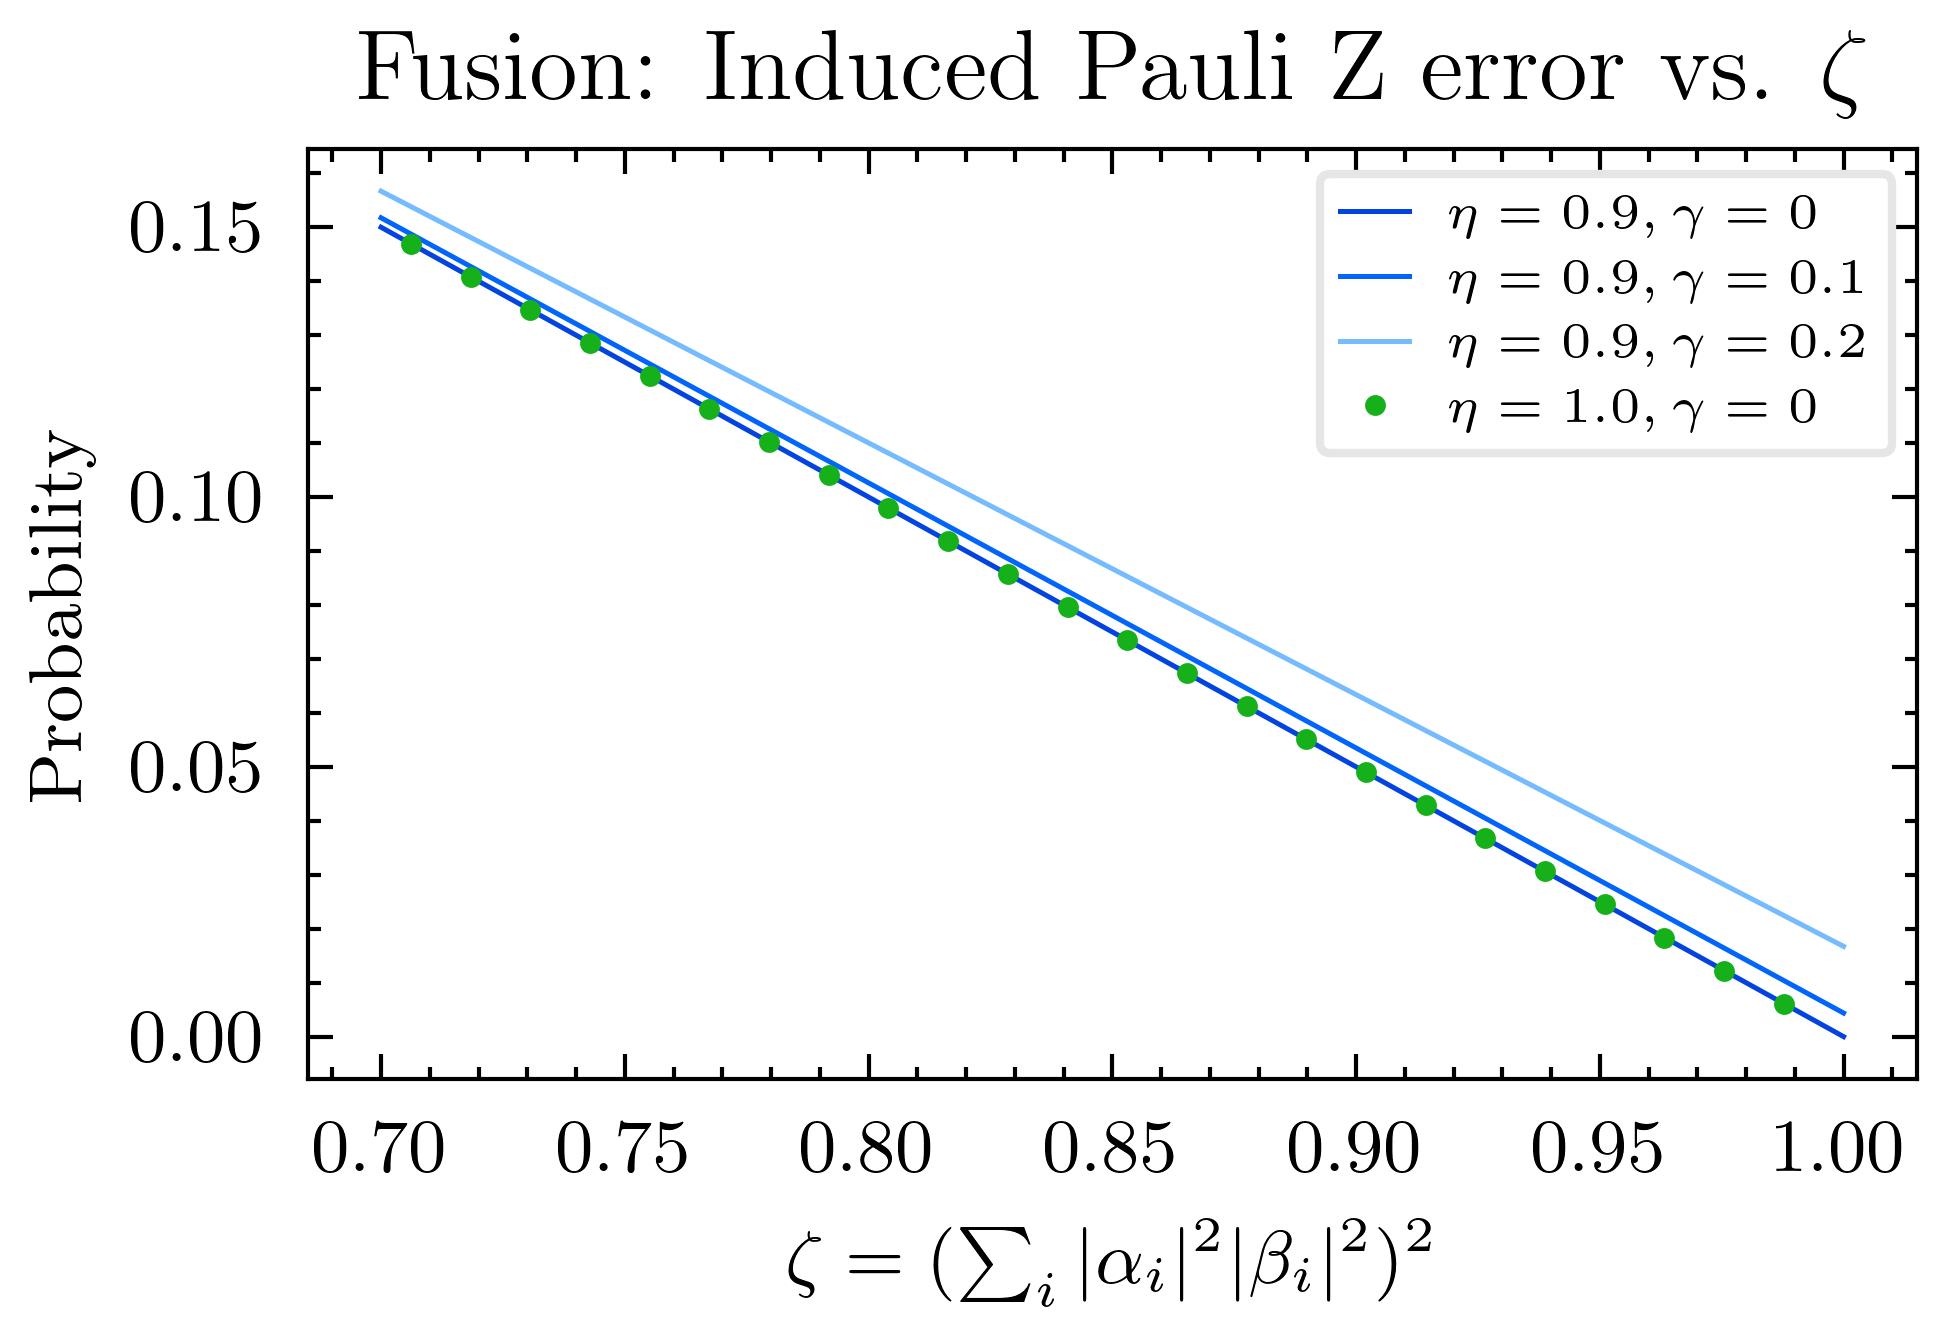

In [75]:

from tkinter import font


fig, p = plt.subplots(1,1)

p.plot(zeta_list, pz_zeta_eta9, label=r'$\eta=0.9, \gamma=0$', linestyle='-', color='xkcd:blue')
p.plot(zeta_list, pz_zeta_eta9_gam1, label=r'$\eta=0.9, \gamma=0.1$', linestyle='-', color='xkcd:bright blue')
p.plot(zeta_list, pz_zeta_eta9_gam2, label=r'$\eta=0.9, \gamma=0.2$', linestyle='-', color='xkcd:sky blue')
p.plot(zeta_list[1:-1:2], pz_zeta_eta1[1:-1:2], label=r'$\eta=1.0, \gamma=0$', marker ='.', ms=3 ,linestyle='', color='xkcd:green')
# p.plot(zeta_list, pz_zeta_eta9_gam3, label=r'$\eta=0.9, \gamma=0.3$', linestyle=':', color='xkcd:light blue')
# p.plot(zeta_list, pz_zeta_eta8_, label=r'$\eta=0.8, \gamma=0$', linestyle=':', color='xkcd:orange')
# p.plot(zeta_list, pz_zeta_eta8_gam1, label=r'$\eta=0.8, \gamma=0.1$', linestyle=':', color='xkcd:bright orange')
# p.plot(zeta_list, pz_zeta_eta8_gam2, label=r'$\eta=0.8, \gamma=0.2$', linestyle=':', color='xkcd:purple')
p.set_xlabel(r'$\zeta = (\sum_i |\alpha_i|^2|\beta_i|^2)^2$')
p.set_ylabel('Probability')
p.set_title(r'Fusion: Induced Pauli Z error vs. $\zeta$')
p.legend( frameon=True, edgecolor='0.9', prop={'size': 6})
plt.show()
fig.savefig('fusion_pz_vs_zeta.png', bbox_inches='tight')

In [6]:
eta_list = np.linspace( 0.7, 1.0, 50)
pz_eta = []
pz_eta_gam1 = []
pz_eta_gam15 = []

pz_eta_gam0zeta98 = []
pz_eta_gam1zeta98 = []
pz_eta_gam15zeta98 = []
for e in eta_list:
    pz_eta.append(pauli_err_fusion(0, 1, e)[2])
    pz_eta_gam1.append(pauli_err_fusion(0.1, 1, e)[2])
    pz_eta_gam15.append(pauli_err_fusion(0.15, 1, e)[2])
    pz_eta_gam0zeta98.append(pauli_err_fusion(0, 0.98, e)[2])
    pz_eta_gam1zeta98.append(pauli_err_fusion(0.1, 0.98, e)[2])
    pz_eta_gam15zeta98.append(pauli_err_fusion(0.15, 0.98, e)[2])


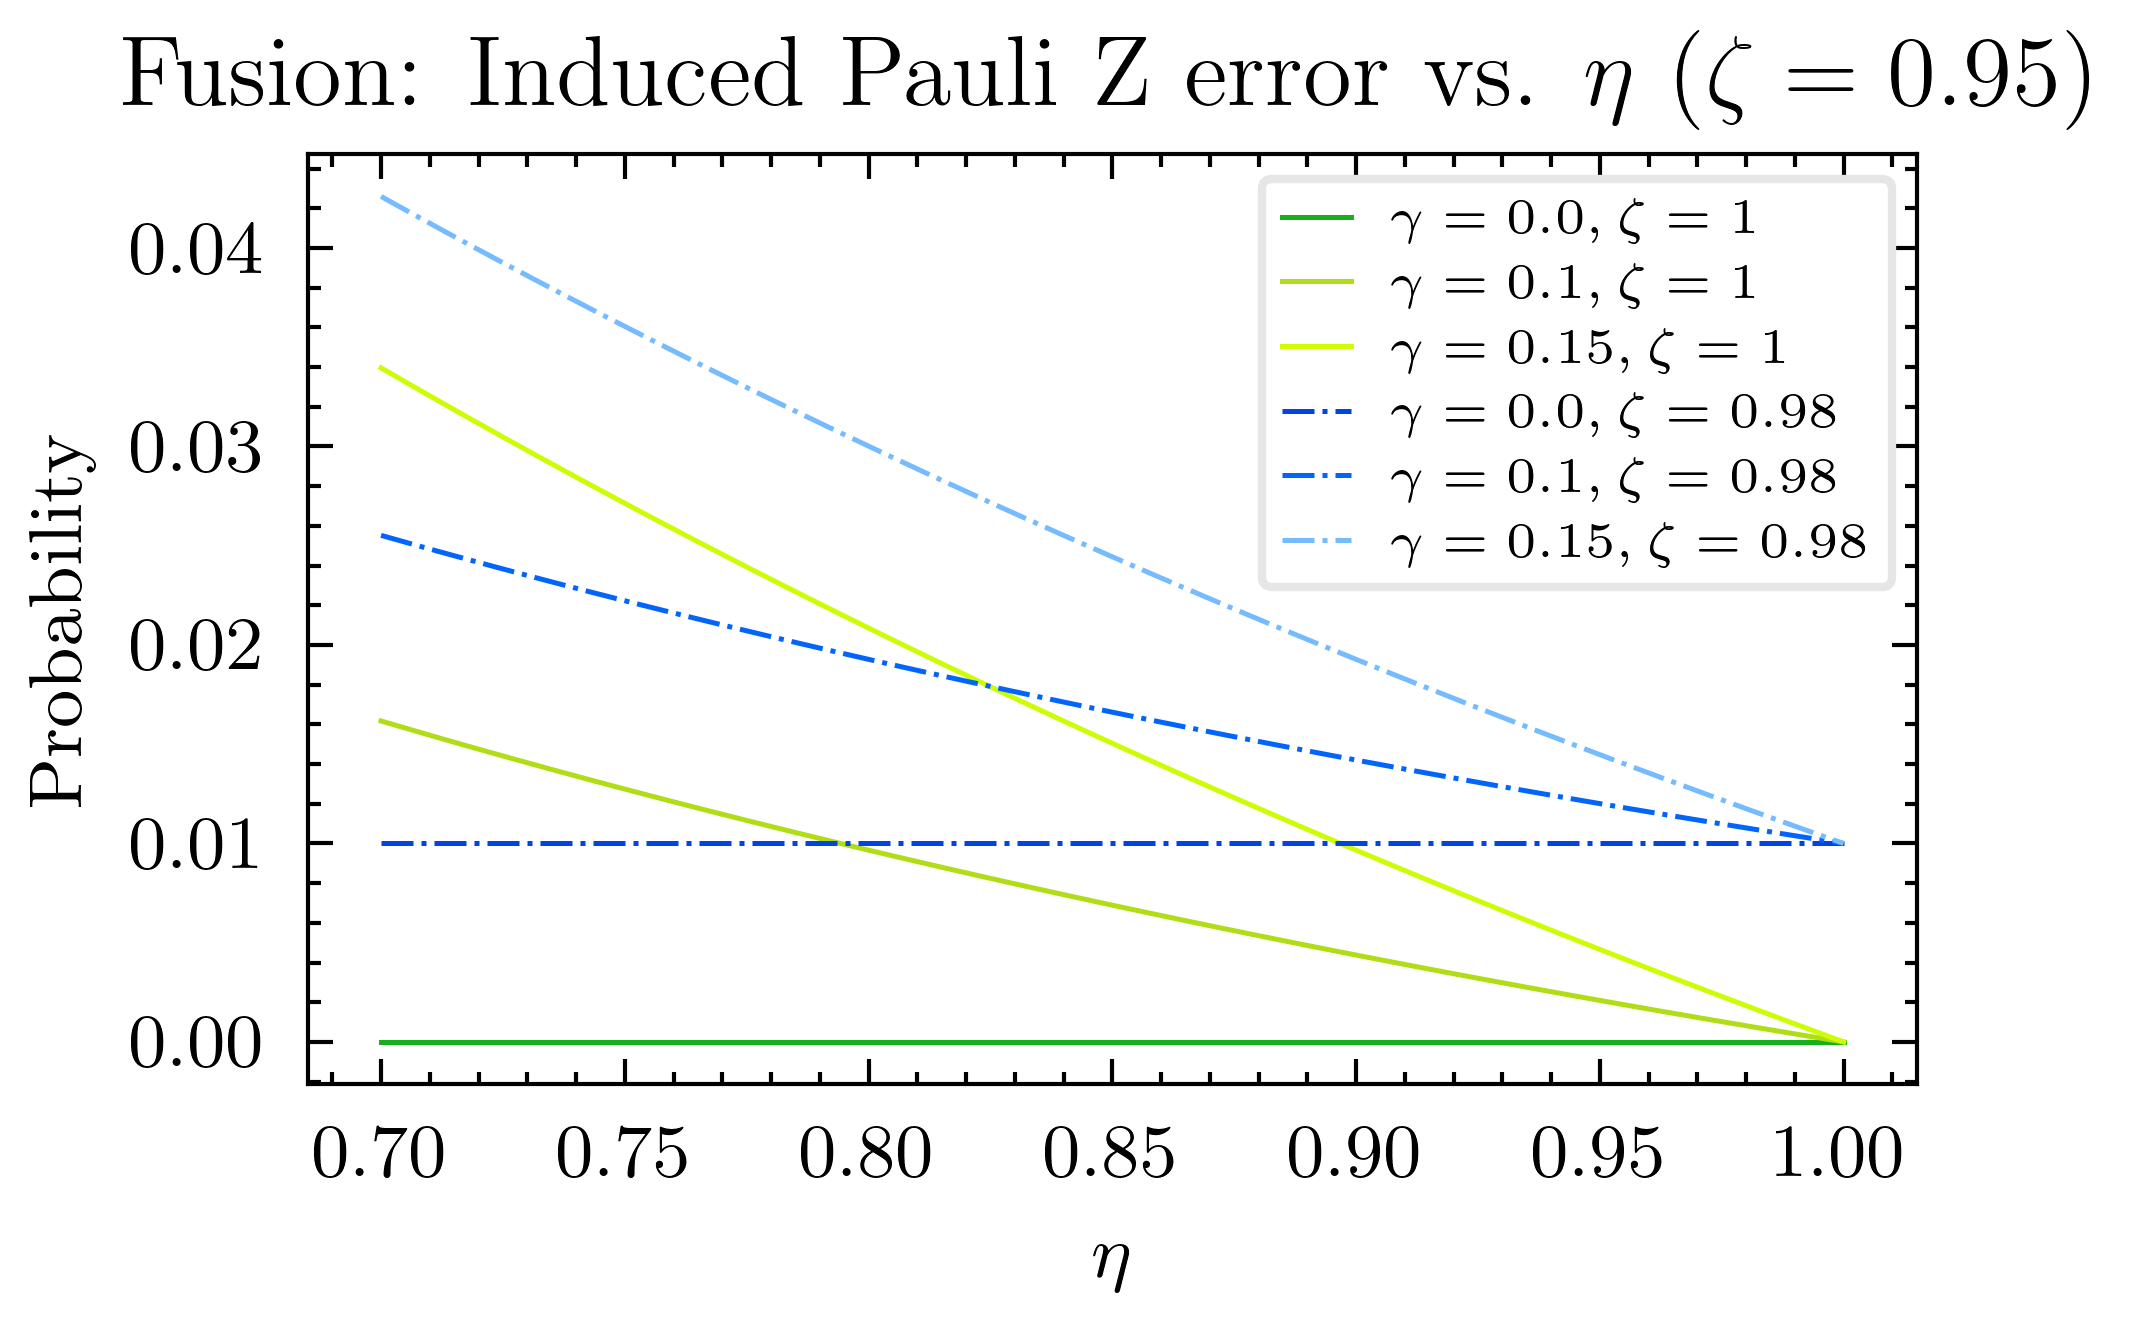

In [7]:
fig, p = plt.subplots(1,1)
p.plot(eta_list, pz_eta, label=r'$\gamma=0.0, \zeta=1$', linestyle='-', color='xkcd:green')
p.plot(eta_list, pz_eta_gam1, label=r'$\gamma=0.1, \zeta=1$', linestyle='-', color='xkcd:yellowish green')
p.plot(eta_list, pz_eta_gam15, label=r'$\gamma=0.15, \zeta=1$', linestyle='-', color='xkcd:greenish yellow')
p.plot(eta_list, pz_eta_gam0zeta98, label=r'$\gamma=0.0, \zeta=0.98$', linestyle='-.', color='xkcd:blue')
p.plot(eta_list, pz_eta_gam1zeta98, label=r'$\gamma=0.1, \zeta=0.98$', linestyle='-.', color='xkcd:bright blue')
p.plot(eta_list, pz_eta_gam15zeta98, label=r'$\gamma=0.15, \zeta=0.98$', linestyle='-.', color='xkcd:sky blue')
p.set_xlabel(r'$\eta$')
p.set_ylabel('Probability')
p.set_title(r'Fusion: Induced Pauli Z error vs. $\eta$  ($\zeta=0.95$)')
p.legend( frameon=True, edgecolor='0.9', prop={'size': 6})
# p.legend(bbox_to_anchor=(1.01, 1), frameon=True, edgecolor='0.9')
plt.show()
fig.savefig('fusion_pz_vs_eta.png', bbox_inches='tight')

# P_x or P_y 

In [8]:
# eta_list = np.linspace( 0.7, 1.0, 50)
px_eta_gamma0 = []
py_eta_gamma0 = []
px_eta_gamma1 = []
py_eta_gamma1 = []
px_eta_gammma15 = []
py_eta_gammma15 = []
px_eta_gammma15zeta98 = []
py_eta_gammma15zeta98 = []

for e in eta_list:
    px, py = pauli_err_fusion(0, 1, e)[0:2]
    px_eta_gamma0.append(px)
    py_eta_gamma0.append(py)
    px, py = pauli_err_fusion(0.1, 1, e)[0:2]
    px_eta_gamma1.append(px)
    py_eta_gamma1.append(py)
    px, py = pauli_err_fusion(0.15, 1, e)[0:2]
    px_eta_gammma15.append(px)
    py_eta_gammma15.append(py)
    # px, py = pauli_err_fusion(0.2, 1, e)[0:2]
    # px_eta_gammma2.append(px)
    px, py = pauli_err_fusion(0.15, 0.98, e)[0:2]
    px_eta_gammma15zeta98.append(px)
    py_eta_gammma15zeta98.append(py)
    # px_eta_gammma2zeta98.append(px)
    # py_eta_gamma1.append(py)
    # px, py = pauli_err_fusion(0, 0.8, e)[0:2]
    # px_eta_gamma0zeta98.append(px)
    # py_eta_gamma0zeta98.append(py)
    # px, py = pauli_err_fusion(0.1, 0.8, e)[0:2]
    # px_eta_gamma1zeta98.append(px)
    # py_eta_gamma1zeta98.append(py)  


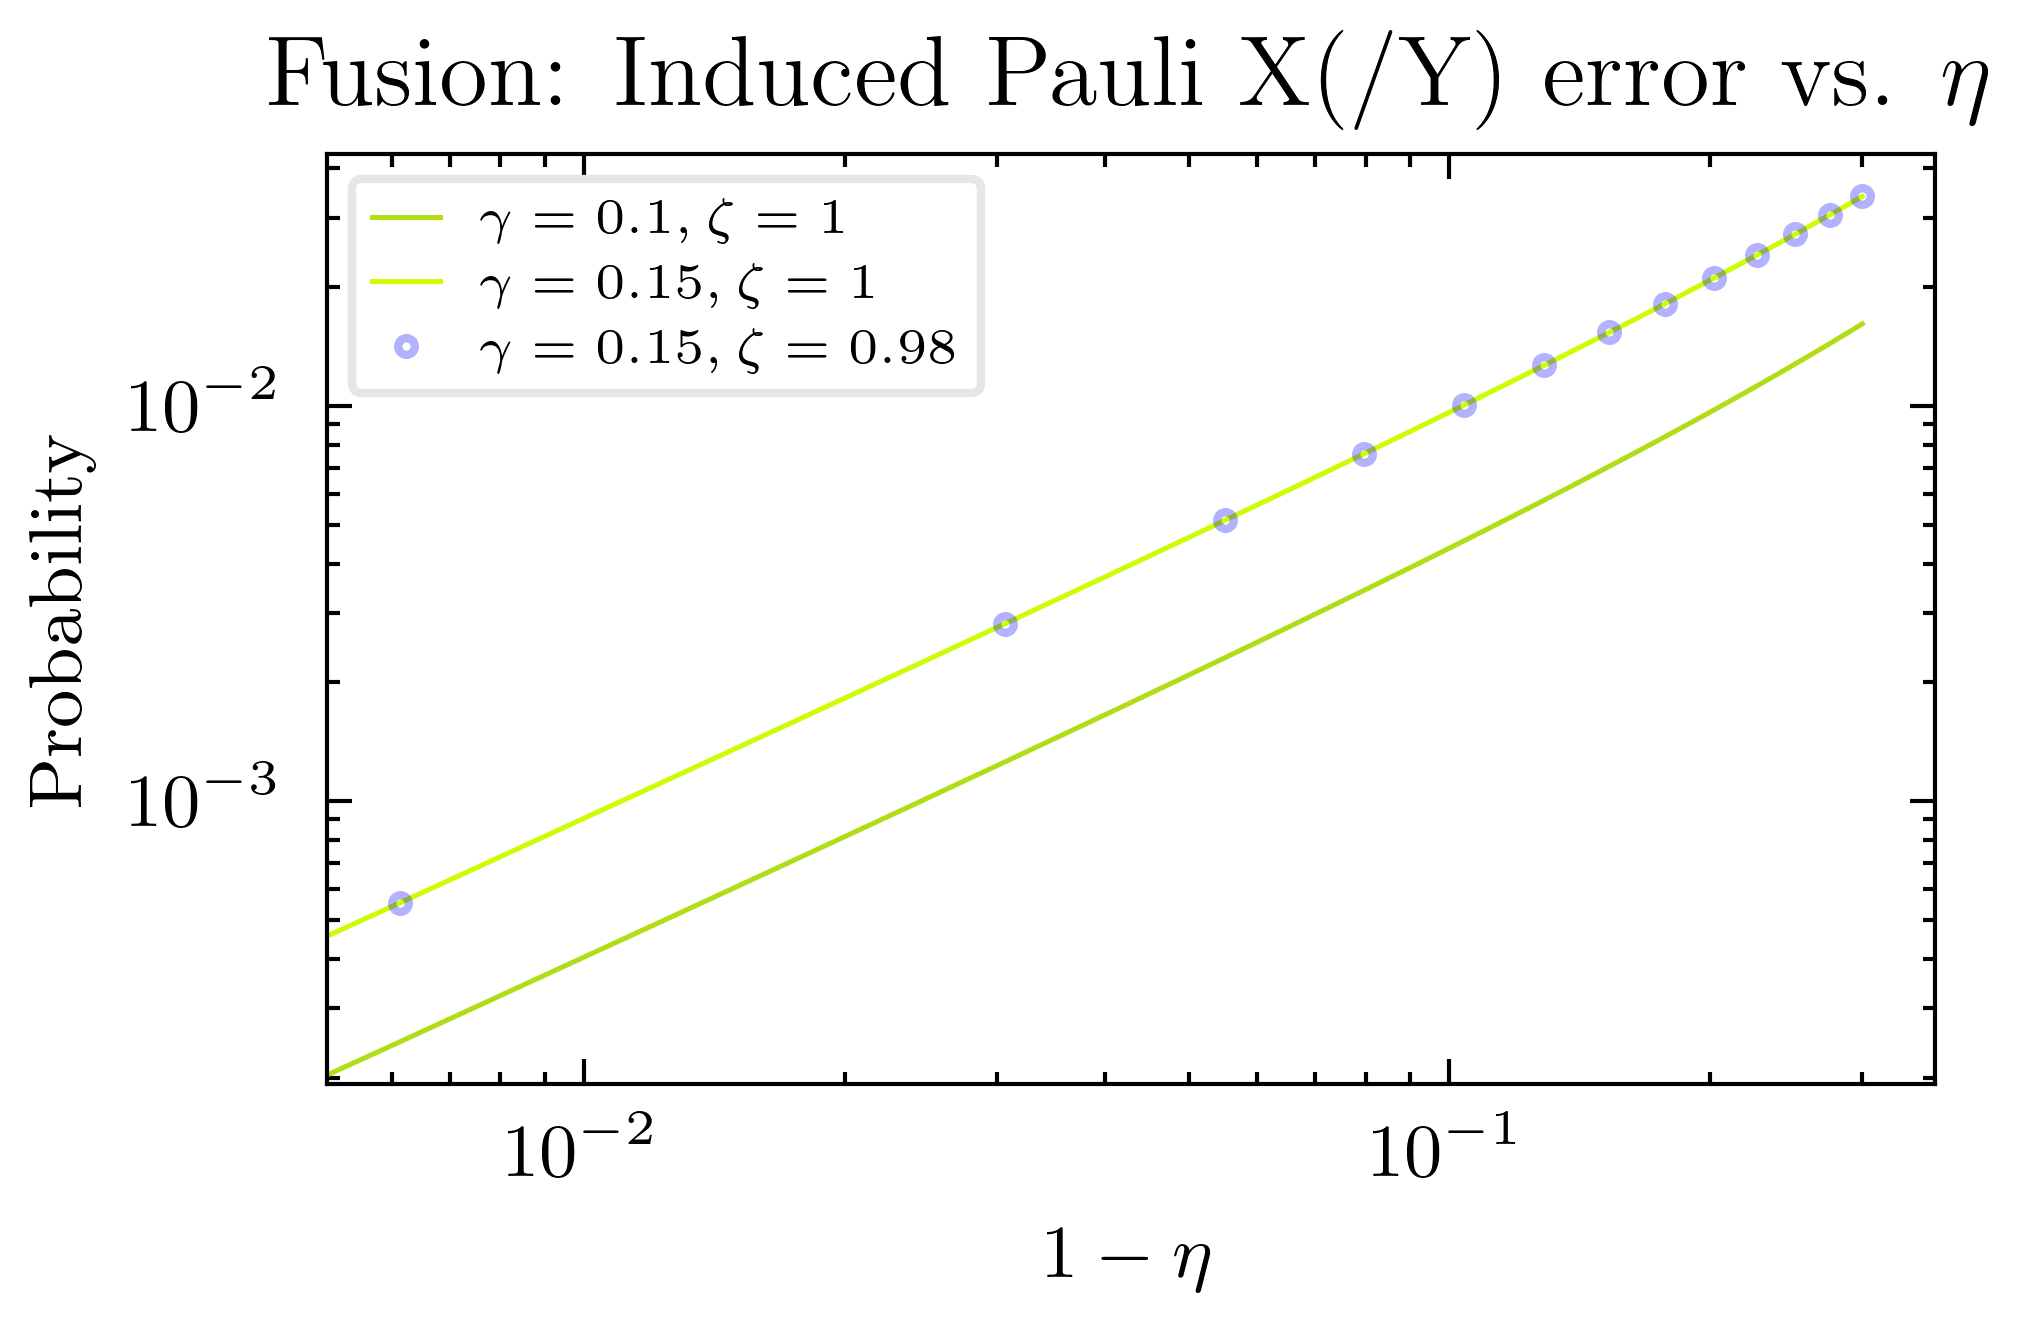

In [23]:
fig, p1 = plt.subplots(1,1)
# p1.plot(eta_list, px_eta_gamma0, label=r'$\gamma=0, \zeta=1$', linestyle='-', color='xkcd:green')
# p1.plot(eta_list, py_eta_gamma0)
p1.plot(1-eta_list, px_eta_gamma1, label=r'$\gamma=0.1, \zeta=1$', linestyle='-', color='xkcd:yellowish green')
p1.plot(1-eta_list, px_eta_gammma15, label=r'$\gamma=0.15, \zeta=1$', linestyle='-', color='xkcd:greenish yellow')
# p1.plot(eta_list, py_eta_gammma15, marker='o')
p1.plot(1-eta_list[::4], px_eta_gammma15zeta98[::4], marker = 'o',fillstyle='none', ms=2 , color=(0,0,1,0.3), linestyle='', label=r'$\gamma=0.15, \zeta=0.98$'  )
# p1.plot(eta_list, py_eta_gammma15zeta98)
# p1.plot(eta_list, px_eta_gamma0zeta98)
# p1.plot(eta_list, px_eta_gamma1zeta98)
# p.plot(eta_list, px_eta1, label=r'$\eta=1.0, \gamma=0$', linestyle='-', color='xkcd:green')
# p.plot(zeta_list, pz_zeta_eta1_gam1, label=r'$\eta=1.0, \gamma=0.1$', linestyle='-', color='xkcd:bright green')
# p.plot(zeta_list, pz_zeta_eta95, label=r'$\eta=0.95, \gamma=0$', linestyle='-.', color='xkcd:blue')
# p.plot(zeta_list, pz_zeta_eta95_gam1, label=r'$\eta=0.95, \gamma=0.1$', linestyle='-.', color='xkcd:bright blue')
# p.plot(zeta_list, pz_zeta_eta95_gam15, label=r'$\eta=0.95, \gamma=0.12$', linestyle='-.', color='xkcd:sky blue')
p1.set_yscale('log')
p1.set_xscale('log')
p1.set_xlabel(r'$1-\eta$')
p1.set_ylabel('Probability')
p1.set_title(r'Fusion: Induced Pauli X(/Y) error vs. $\eta$')
p1.legend( frameon=True, edgecolor='0.9', prop={'size': 6})
# plt.show()
fig.savefig('fusion_px_vs_eta.png', bbox_inches='tight')

In [84]:
z85 = [0.15139211136890957, 0.14892691415313242, 0.14646171693735494, 0.14399651972157756, 0.14153132250580042, 0.13906612529002316, 0.13660092807424587, 0.13413573085846883, 0.13167053364269138, 0.12920533642691406, 0.12674013921113675, 0.1242749419953596, 0.12180974477958242, 0.11934454756380519, 0.1168793503480279, 0.11441415313225045, 0.11194895591647303, 0.10948375870069599, 0.10701856148491895, 0.10455336426914127, 0.10208816705336399, 0.09962296983758684, 0.0971577726218098, 0.09469257540603254, 0.09222737819025514, 0.08976218097447788, 0.08729698375870082, 0.08483178654292334, 0.0823665893271463, 0.07990139211136907, 0.07743619489559192, 0.07497099767981447, 0.07250580046403712, 0.07004060324825986, 0.06757540603248258, 0.0651102088167051, 0.06264501160092814, 0.060179814385150826, 0.05771461716937343, 0.05524941995359656, 0.05278422273781891, 0.05031902552204165, 0.04785382830626439, 0.04538863109048699, 0.042923433874709926, 0.04045823665893267, 0.03799303944315524, 0.035527842227378065, 0.033062645011601055, 0.030597447795823463, 0.02813225058004662, 0.02566705336426911, 0.023201856148491795, 0.020736658932714647, 0.018271461716937415, 0.01580626450115996, 0.013341067285382702, 0.01087587006960547, 0.008410672853828238, 0.005945475638051145]

z90 = [0.15088105726872234, 0.14840308370044056, 0.14592511013215878, 0.14344713656387667, 0.14096916299559487, 0.13849118942731295, 0.13601321585903084, 0.13353524229074887, 0.13105726872246704, 0.12857929515418506, 0.1261013215859031, 0.12362334801762115, 0.12114537444933918, 0.11866740088105712, 0.11618942731277537, 0.11371145374449329, 0.11123348017621154, 0.1087555066079296, 0.10627753303964754, 0.10379955947136557, 0.1013215859030838, 0.09884361233480193, 0.09636563876651982, 0.0938876651982381, 0.09140969162995591, 0.0889317180616741, 0.08645374449339233, 0.08397577092511038, 0.08149779735682822, 0.07901982378854625, 0.07654185022026436, 0.07406387665198264, 0.07158590308370055, 0.0691079295154185, 0.06662995594713658, 0.06415198237885456, 0.06167400881057264, 0.05919603524229072, 0.05671806167400889, 0.05424008810572706, 0.051762114537444864, 0.04928414096916281, 0.04680616740088128, 0.04432819383259909, 0.04185022026431731, 0.03937224669603542, 0.03689427312775323, 0.034416299559471314, 0.031938325991189426, 0.029460352422907704, 0.02698237885462551, 0.024504405286343622, 0.022026431718061845, 0.019548458149779763, 0.017070484581497847, 0.014592511013216097, 0.01211453744493407, 0.009636563876652043, 0.0071585903083701, 0.004680616740088017]
z1 = [0.15000000000000002, 0.14750000000000008, 0.14499999999999996, 0.14250000000000002, 0.14, 0.13749999999999996, 0.13500000000000006, 0.13249999999999998, 0.13, 0.1275, 0.12499999999999997, 0.1225, 0.12000000000000002, 0.1175, 0.11499999999999999, 0.1124999999999999, 0.10999999999999996, 0.10749999999999998, 0.10499999999999995, 0.10250000000000001, 0.09999999999999992, 0.09749999999999998, 0.09499999999999997, 0.0925, 0.09000000000000005, 0.08750000000000002, 0.08500000000000002, 0.08250000000000002, 0.08000000000000007, 0.07750000000000007, 0.07500000000000004, 0.07250000000000001, 0.07000000000000003, 0.06749999999999998, 0.065, 0.0625, 0.060000000000000026, 0.05749999999999997, 0.05499999999999999, 0.05249999999999999, 0.04999999999999999, 0.04749999999999999, 0.044999999999999984, 0.042499999999999954, 0.03999999999999998, 0.03749999999999998, 0.03499999999999995, 0.03249999999999997, 0.03, 0.027499999999999997, 0.024999999999999994, 0.022499999999999992, 0.020000000000000018, 0.017499999999999988, 0.015000000000000013, 0.012500000000000011, 0.010000000000000037, 0.007500000000000007, 0.0050000000000000044, 0.0024999999999999745]

# ζ_vals = np.linspace(0.7, 0.999, len(z85))

In [85]:
z85_1 = [0.15035169988276673, 0.1478604923798359, 0.14536928487690504, 0.14287807737397418, 0.14038686987104337, 0.13789566236811257, 0.13540445486518182, 0.13291324736225085, 0.13042203985932, 0.12793083235638927, 0.1254396248534584, 0.12294841735052758, 0.1204572098475967, 0.1179660023446659, 0.11547479484173512, 0.11298358733880429, 0.1104923798358734, 0.10800117233294254, 0.1055099648300118, 0.10301875732708082, 0.10052754982415005, 0.09803634232121919, 0.09554513481828847, 0.09305392731535761, 0.09056271981242689, 0.08807151230949598, 0.08558030480656512, 0.08308909730363431, 0.08059788980070351, 0.0781066822977726, 0.07561547479484185, 0.0731242672919108, 0.0706330597889801, 0.06814185228604927, 0.06565064478311844, 0.06315943728018761, 0.06066822977725675, 0.05817702227432592, 0.05568581477139517, 0.05319460726846417, 0.05070339976553337, 0.048212192262602566, 0.04572098475967171, 0.04322977725674082, 0.040738569753810155, 0.038247362250879324, 0.035756154747948465, 0.03326494724501752, 0.030773739742086748, 0.02828253223915589, 0.025791324736225058, 0.023300117233294226, 0.020808909730363423, 0.018317702227432675, 0.01582649472450179, 0.01333528722157093, 0.010844079718640182, 0.008352872215709267, 0.005861664712778436, 0.0033704572098475494]

z09_1 = [0.1502217294900222, 0.14772727272727282, 0.14523281596452323, 0.14273835920177383, 0.1402439024390244, 0.13774944567627492, 0.1352549889135255, 0.13276053215077602, 0.13026607538802654, 0.12777161862527717, 0.12527716186252771, 0.12278270509977826, 0.12028824833702881, 0.11779379157427936, 0.11529933481152987, 0.11280487804878045, 0.11031042128603102, 0.10781596452328154, 0.10532150776053206, 0.10282705099778272, 0.10033259423503327, 0.09783813747228387, 0.09534368070953436, 0.09284922394678502, 0.0903547671840354, 0.08786031042128606, 0.08536585365853655, 0.0828713968957871, 0.0803769401330377, 0.0778824833702883, 0.0753880266075388, 0.07289356984478934, 0.07039911308203992, 0.06790465631929052, 0.06541019955654095, 0.0629157427937915, 0.06042128603104205, 0.05792682926829271, 0.055432372505543226, 0.05293791574279377, 0.050443458980044376, 0.04794900221729498, 0.045454545454545414, 0.042960088691796045, 0.040465631929046536, 0.037971175166297055, 0.03547671840354766, 0.03298226164079815, 0.030487804878048724, 0.027993348115299438, 0.025498891352550013, 0.023004434589800504, 0.020509977827050968, 0.018015521064301515, 0.01552106430155209, 0.013026607538802665, 0.010532150776053184, 0.008037694013303703, 0.005543237250554306, 0.003048780487804853]

z1_1 = [0.15000000000000002, 0.14750000000000005, 0.145, 0.1425, 0.14, 0.13749999999999998, 0.13500000000000006, 0.1325, 0.13, 0.1275, 0.125, 0.1225, 0.12, 0.1175, 0.11499999999999999, 0.11249999999999996, 0.10999999999999999, 0.10749999999999998, 0.10499999999999995, 0.10249999999999998, 0.09999999999999995, 0.09749999999999998, 0.09499999999999995, 0.0925, 0.09000000000000002, 0.08750000000000002, 0.08500000000000002, 0.08249999999999999, 0.08000000000000004, 0.07750000000000004, 0.07500000000000001, 0.07250000000000001, 0.07, 0.0675, 0.065, 0.0625, 0.06, 0.057499999999999996, 0.05499999999999999, 0.05249999999999999, 0.04999999999999999, 0.04749999999999999, 0.044999999999999984, 0.04249999999999998, 0.03999999999999998, 0.03749999999999998, 0.034999999999999976, 0.03249999999999997, 0.030000000000000027, 0.027499999999999997, 0.025000000000000022, 0.02250000000000002, 0.020000000000000018, 0.017500000000000016, 0.015000000000000013, 0.012500000000000011, 0.010000000000000009, 0.007500000000000007, 0.0050000000000000044, 0.0025000000000000022]
ζ_vals2 = np.linspace(0.7, 0.999, len(z1_1))

z_perf = [0.15000000000000002, 0.14750000000000008, 0.14499999999999996, 0.14250000000000002, 0.14, 0.13749999999999996, 0.13500000000000006, 0.13249999999999998, 0.13, 0.1275, 0.12499999999999997, 0.1225, 0.12000000000000002, 0.1175, 0.11499999999999999, 0.1124999999999999, 0.10999999999999996, 0.10749999999999998, 0.10499999999999995, 0.10250000000000001, 0.09999999999999992, 0.09749999999999998, 0.09499999999999997, 0.0925, 0.09000000000000005, 0.08750000000000002, 0.08500000000000002, 0.08250000000000002, 0.08000000000000007, 0.07750000000000007, 0.07500000000000004, 0.07250000000000001, 0.07000000000000003, 0.06749999999999998, 0.065, 0.0625, 0.060000000000000026, 0.05749999999999997, 0.05499999999999999, 0.05249999999999999, 0.04999999999999999, 0.04749999999999999, 0.044999999999999984, 0.042499999999999954, 0.03999999999999998, 0.03749999999999998, 0.03499999999999995, 0.03249999999999997, 0.03, 0.027499999999999997, 0.024999999999999994, 0.022499999999999992, 0.020000000000000018, 0.017499999999999988, 0.015000000000000013, 0.012500000000000011, 0.010000000000000037, 0.007500000000000007, 0.0050000000000000044, 0.0024999999999999745]


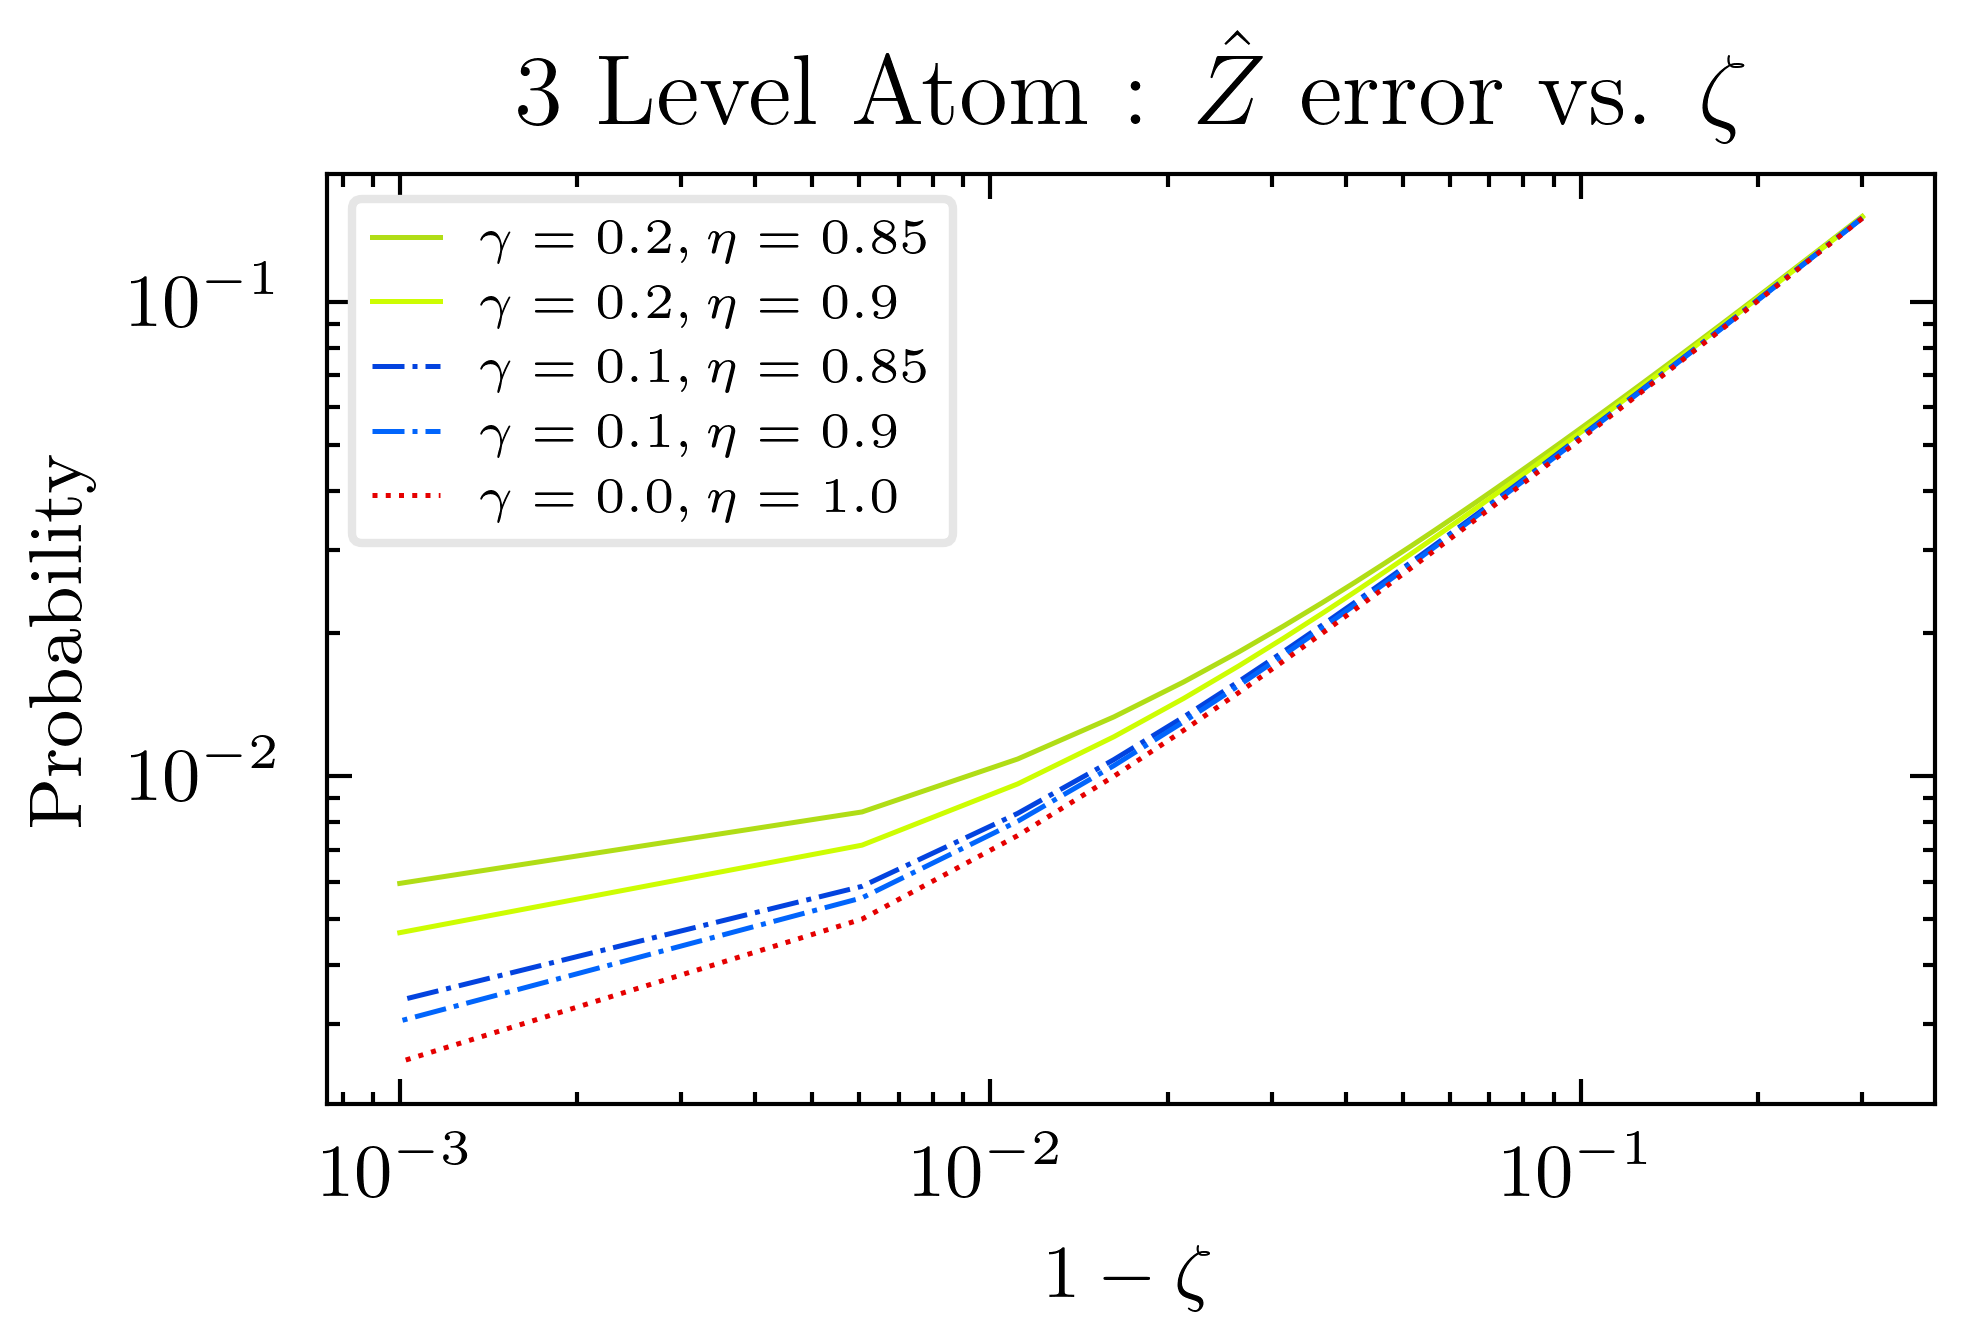

In [89]:
fig, p1 = plt.subplots(1,1)
# p1.plot(eta_list, px_eta_gamma0, label=r'$\gamma=0, \zeta=1$', linestyle='-', color='xkcd:green')
p1.plot(1- ζ_vals2, z85, label=r'$\gamma=0.2, \eta=0.85$', linestyle='-', color='xkcd:yellowish green')
p1.plot(1-ζ_vals2, z90, label=r'$\gamma=0.2, \eta=0.9$', linestyle='-', color='xkcd:greenish yellow')
# p1.plot(1-ζ_vals2, z1, label=r'$\gamma=0.2, \eta=1.0$' ,linestyle='-', color='xkcd:green') 
# p.plot(eta_list, px_eta1, label=r'$\eta=1.0, \gamma=0$', linestyle='-', color='xkcd:green')
# p.plot(zeta_list, pz_zeta_eta1_gam1, label=r'$\eta=1.0, \gamma=0.1$', linestyle='-', color='xkcd:bright green')
p1.plot(1-ζ_vals2, z85_1, label=r'$\gamma=0.1, \eta=0.85$', linestyle='-.', color='xkcd:blue')
p1.plot(1-ζ_vals2, z09_1, label=r'$\gamma=0.1, \eta=0.9$', linestyle='-.', color='xkcd:bright blue')
# p1.plot(1-ζ_vals2, z1_1, label=r'$\gamma=0.1, \eta=1.0$', linestyle='-.', color='xkcd:sky blue')
p1.plot(1-ζ_vals2, z_perf, label=r'$\gamma=0.0, \eta=1.0$', linestyle=':', color='xkcd:red')
p1.set_yscale('log')
p1.set_xscale('log')
p1.set_xlabel(r'$1-\zeta$')
p1.set_ylabel('Probability')
p1.set_title(r'3 Level Atom : $\hat{Z}$ error vs. $\zeta$')
p1.legend( frameon=True, edgecolor='0.9', prop={'size': 6})
# plt.show()
fig.savefig('stab_pz_vs_zeta.png', bbox_inches='tight')

In [53]:
x85 = [0.30140186915887857, 0.29643691588785054, 0.2914719626168224, 0.28650700934579443, 0.2815420560747663, 0.2765771028037383, 0.2716121495327103, 0.2666471962616823, 0.26168224299065423, 0.25671728971962626, 0.2517523364485982, 0.24678738317757, 0.24182242990654196, 0.236857476635514, 0.23189252336448607, 0.2269275700934579, 0.22196261682242982, 0.21699766355140176, 0.21203271028037368, 0.20706775700934565, 0.2021028037383176, 0.19713785046728968, 0.19217289719626177, 0.18720794392523374, 0.1822429906542057, 0.17727803738317768, 0.1723130841121496, 0.16734813084112163, 0.16238317757009343, 0.1574182242990655, 0.15245327102803743, 0.14748831775700938, 0.1425233644859812, 0.13755841121495324, 0.13259345794392524, 0.12762850467289713, 0.12266355140186916, 0.11769859813084099, 0.11273364485981299, 0.10776869158878508, 0.10280373831775691, 0.09783878504672888, 0.09287383177570088, 0.08790887850467291, 0.08294392523364486, 0.07797897196261674, 0.07301401869158872, 0.06804906542056063, 0.06308411214953277, 0.05811915887850469, 0.053154205607476634, 0.04818925233644872, 0.043224299065420635, 0.038259345794392496, 0.03329439252336441, 0.02832943925233647, 0.023364485981308386, 0.018399532710280414, 0.013434579439252387, 0.008469626168224248]

x90 = [0.3008849557522124, 0.2959070796460177, 0.29092920353982304, 0.28595132743362833, 0.2809734513274337, 0.2759955752212391, 0.27101769911504436, 0.2660398230088496, 0.2610619469026549, 0.2560840707964601, 0.25110619469026546, 0.2461283185840709, 0.24115044247787595, 0.23617256637168152, 0.23119469026548667, 0.22621681415929207, 0.2212389380530973, 0.21626106194690253, 0.21128318584070793, 0.20630530973451322, 0.20132743362831854, 0.1963495575221238, 0.19137168141592914, 0.18639380530973462, 0.18141592920353983, 0.17643805309734517, 0.1714601769911505, 0.16648230088495572, 0.16150442477876098, 0.15652654867256635, 0.1515486725663716, 0.14657079646017698, 0.14159292035398227, 0.1366150442477876, 0.13163716814159301, 0.12665929203539825, 0.1216814159292035, 0.11670353982300877, 0.1117256637168143, 0.10674778761061943, 0.10176991150442471, 0.09679203539823003, 0.09181415929203532, 0.08683628318584072, 0.08185840707964598, 0.07688053097345116, 0.07190265486725658, 0.06692477876106187, 0.06194690265486738, 0.05696902654867264, 0.05199115044247796, 0.0470132743362833, 0.04203539823008856, 0.03705752212389385, 0.03207964601769922, 0.02710176991150426, 0.022123893805309713, 0.017146017699114974, 0.012168141592920345, 0.0071902654867256055]

x10 = [0.30000000000000004, 0.29500000000000004, 0.29000000000000004, 0.285, 0.28, 0.27499999999999997, 0.2700000000000001, 0.265, 0.25999999999999995, 0.255, 0.24999999999999997, 0.245, 0.24, 0.23499999999999996, 0.22999999999999998, 0.22499999999999995, 0.22000000000000006, 0.21499999999999994, 0.20999999999999994, 0.20499999999999993, 0.19999999999999993, 0.19499999999999992, 0.18999999999999997, 0.18500000000000003, 0.18, 0.17500000000000004, 0.1700000000000001, 0.1650000000000001, 0.16000000000000006, 0.15499999999999997, 0.15000000000000005, 0.145, 0.14, 0.13500000000000004, 0.13, 0.12499999999999997, 0.11999999999999997, 0.11499999999999996, 0.10999999999999999, 0.10499999999999998, 0.09999999999999995, 0.09499999999999997, 0.08999999999999989, 0.08499999999999996, 0.07999999999999996, 0.07499999999999996, 0.07, 0.06499999999999995, 0.06000000000000005, 0.05500000000000005, 0.05000000000000002, 0.04500000000000004, 0.040000000000000036, 0.03500000000000003, 0.030000000000000054, 0.025000000000000022, 0.020000000000000046, 0.015000000000000013, 0.010000000000000009, 0.005000000000000032]

D_list = np.linspace(0.7, 1.0, len(x85))

x85_1 = [0.30035231943628904, 0.29536112742219606, 0.29036993540810346, 0.2853787433940106, 0.2803875513799179, 0.27539635936582496, 0.2704051673517323, 0.26541397533763955, 0.2604227833235466, 0.25543159130945386, 0.2504403992953611, 0.24544920728126846, 0.24045801526717556, 0.2354668232530827, 0.2304756312389899, 0.2254844392248972, 0.2204932472108044, 0.21550205519671164, 0.21051086318261886, 0.2055196711685262, 0.20052847915443342, 0.1955372871403405, 0.19054609512624765, 0.18555490311215503, 0.18056371109806227, 0.17557251908396962, 0.17058132706987664, 0.1655901350557838, 0.16059894304169103, 0.15560775102759847, 0.15061655901350549, 0.1456253669994128, 0.14063417498532, 0.1356429829712273, 0.13065179095713444, 0.12566059894304163, 0.1206694069289489, 0.11567821491485614, 0.11068702290076332, 0.10569583088667053, 0.10070463887257763, 0.0957134468584849, 0.09072225484439206, 0.08573106283029944, 0.08073987081620665, 0.0757486788021138, 0.07075748678802107, 0.06576629477392831, 0.06077510275983561, 0.05578391074574285, 0.05079271873165009, 0.04580152671755705, 0.04081033470346451, 0.03581914268937181, 0.03082795067527888, 0.025836758661186038, 0.020845566647093472, 0.015854374633000518, 0.010863182618907702, 0.0058719906048149695]

x90_1 = [0.300221975582686, 0.29522752497225313, 0.2902330743618202, 0.2852386237513874, 0.2802441731409545, 0.27524972253052166, 0.2702552719200888, 0.265260821309656, 0.26026637069922315, 0.2552719200887903, 0.25027746947835744, 0.2452830188679246, 0.24028856825749165, 0.23529411764705885, 0.2302996670366259, 0.225305216426193, 0.22031076581576015, 0.21531631520532732, 0.2103218645948946, 0.20532741398446158, 0.20033296337402876, 0.19533851276359593, 0.19034406215316307, 0.1853496115427303, 0.1803551609322975, 0.1753607103218646, 0.17036625971143182, 0.165371809100999, 0.160377358490566, 0.1553829078801333, 0.15038845726970057, 0.14539400665926752, 0.14039955604883467, 0.13540510543840167, 0.13041065482796896, 0.12541620421753605, 0.12042175360710322, 0.11542730299667037, 0.11043285238623743, 0.10543840177580463, 0.10044395116537169, 0.09544950055493903, 0.09045504994450615, 0.08546059933407313, 0.08046614872364041, 0.07547169811320742, 0.0704772475027747, 0.06548279689234171, 0.06048834628190908, 0.055493895671476196, 0.050499445061043424, 0.045504994450610486, 0.04051054384017769, 0.03551609322974472, 0.03052164261931198, 0.025527192008879124, 0.020532741398446214, 0.015538290788013331, 0.010543840177580477, 0.005549389567147595]

x10_1 = [0.30000000000000004, 0.29500000000000004, 0.29000000000000004, 0.285, 0.28, 0.27499999999999997, 0.2700000000000001, 0.265, 0.25999999999999995, 0.255, 0.24999999999999997, 0.245, 0.24, 0.23499999999999996, 0.22999999999999998, 0.22499999999999995, 0.22000000000000006, 0.21499999999999994, 0.20999999999999994, 0.20499999999999993, 0.19999999999999993, 0.19499999999999992, 0.18999999999999997, 0.18500000000000003, 0.18, 0.17500000000000004, 0.1700000000000001, 0.1650000000000001, 0.16000000000000006, 0.15499999999999997, 0.15000000000000005, 0.145, 0.14, 0.13500000000000004, 0.13, 0.12499999999999997, 0.11999999999999997, 0.11499999999999996, 0.10999999999999999, 0.10499999999999998, 0.09999999999999995, 0.09499999999999997, 0.08999999999999989, 0.08499999999999996, 0.07999999999999996, 0.07499999999999996, 0.07, 0.06499999999999995, 0.06000000000000005, 0.05500000000000005, 0.05000000000000002, 0.04500000000000004, 0.040000000000000036, 0.03500000000000003, 0.030000000000000054, 0.025000000000000022, 0.020000000000000046, 0.015000000000000013, 0.010000000000000009, 0.005000000000000032]

x_perf = [0.30000000000000004, 0.29500000000000004, 0.29000000000000004, 0.285, 0.28, 0.27499999999999997, 0.2700000000000001, 0.265, 0.25999999999999995, 0.255, 0.24999999999999997, 0.245, 0.24, 0.23499999999999996, 0.22999999999999998, 0.22499999999999995, 0.22000000000000006, 0.21499999999999994, 0.20999999999999994, 0.20499999999999993, 0.19999999999999993, 0.19499999999999992, 0.18999999999999997, 0.18500000000000003, 0.18, 0.17500000000000004, 0.1700000000000001, 0.1650000000000001, 0.16000000000000006, 0.15499999999999997, 0.15000000000000005, 0.145, 0.14, 0.13500000000000004, 0.13, 0.12499999999999997, 0.11999999999999997, 0.11499999999999996, 0.10999999999999999, 0.10499999999999998, 0.09999999999999995, 0.09499999999999997, 0.08999999999999989, 0.08499999999999996, 0.07999999999999996, 0.07499999999999996, 0.07, 0.06499999999999995, 0.06000000000000005, 0.05500000000000005, 0.05000000000000002, 0.04500000000000004, 0.040000000000000036, 0.03500000000000003, 0.030000000000000054, 0.025000000000000022, 0.020000000000000046, 0.015000000000000013, 0.010000000000000009, 0.005000000000000032]

(0.008469626168224248, 0.008410672853828322)

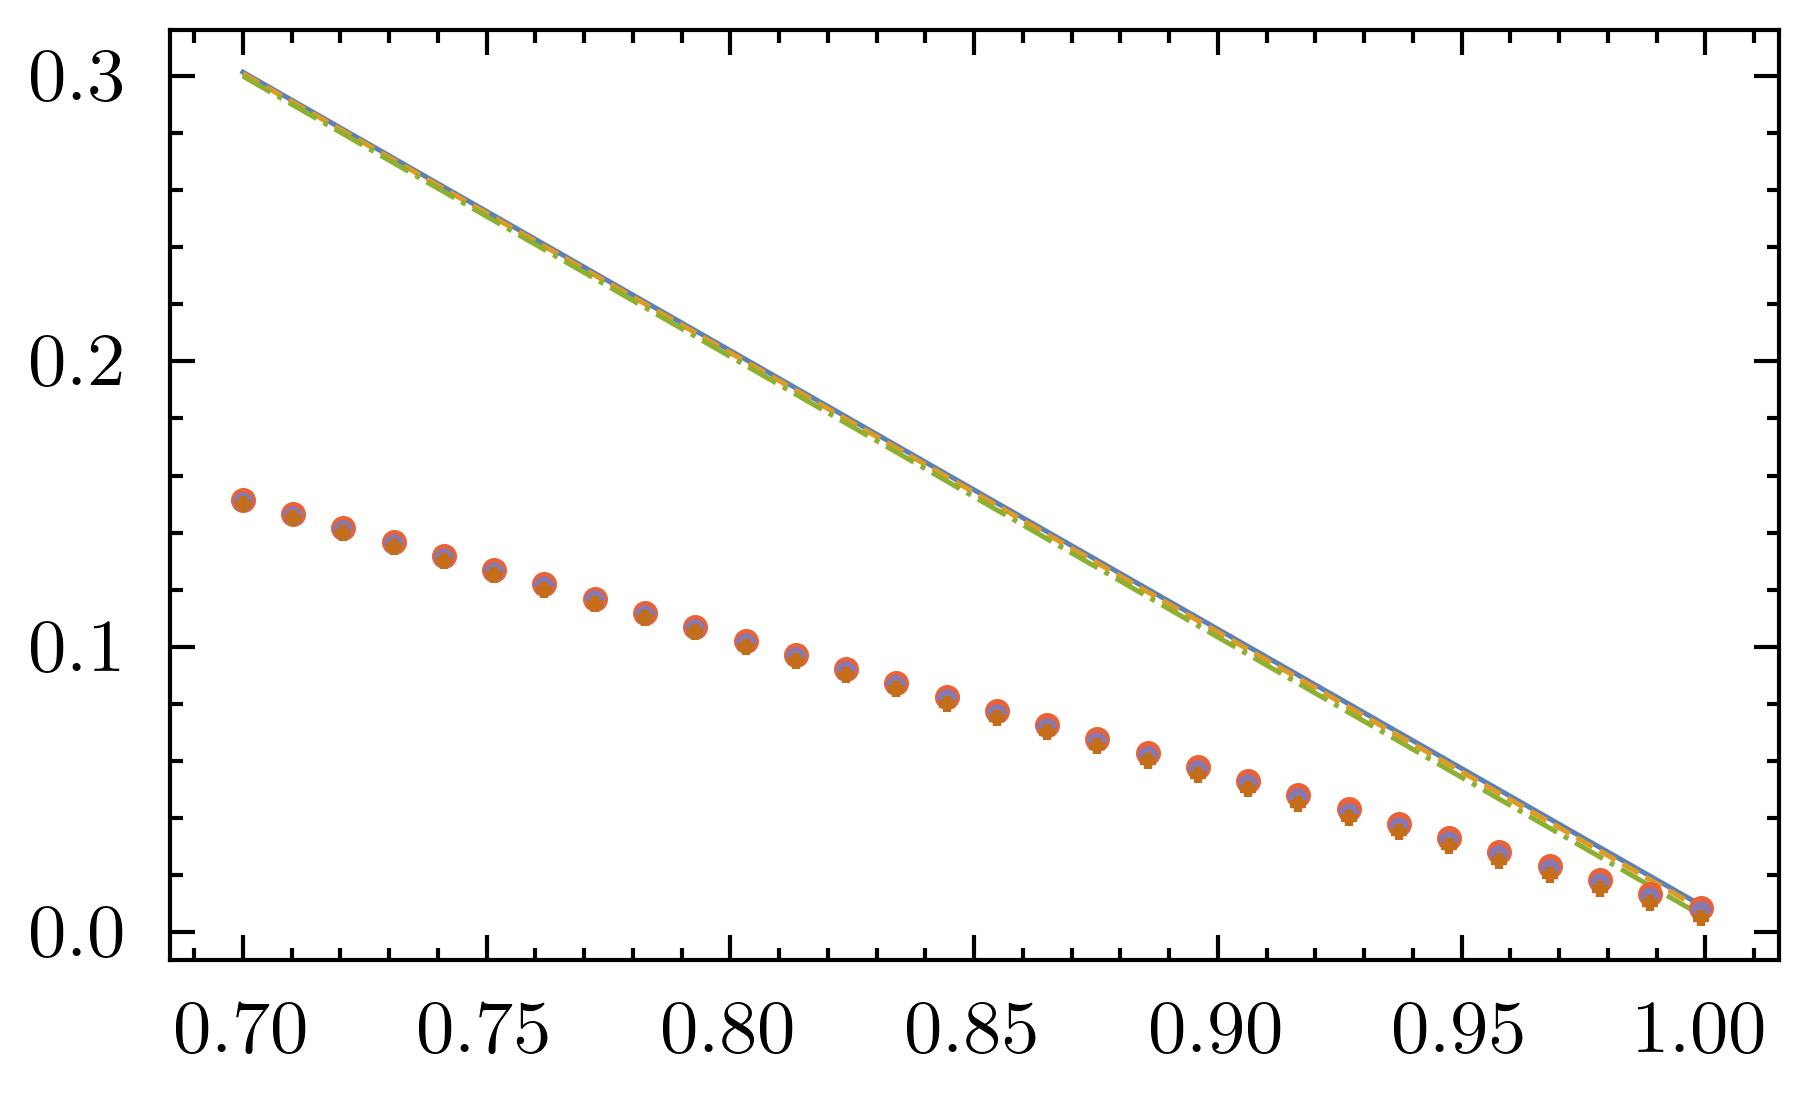

In [43]:

fig, p1 = plt.subplots(1,1)
p1.plot(D_list, x85)
p1.plot(D_list, x90)
p1.plot(D_list, x10)
# p1.plot(D_list, x85_1, linestyle='--')
# p1.plot(D_list, x90_1, linestyle='--')
# p1.plot(D_list, x10_1, linestyle='--')
p1.plot(ζ_vals, z85, marker='o', ms=2, linestyle='')
p1.plot(ζ_vals, z09, marker='*', ms=2, linestyle='')
p1.plot(ζ_vals, z1, marker='+', ms=2, linestyle='')
# p1.plot(ζ_vals2, z85_1, linestyle='--')
# p1.plot(ζ_vals2, z09_1, linestyle='--')
# p1.plot(ζ_vals2, z1_1, linestyle='--')
x85[-1], z85[-1]

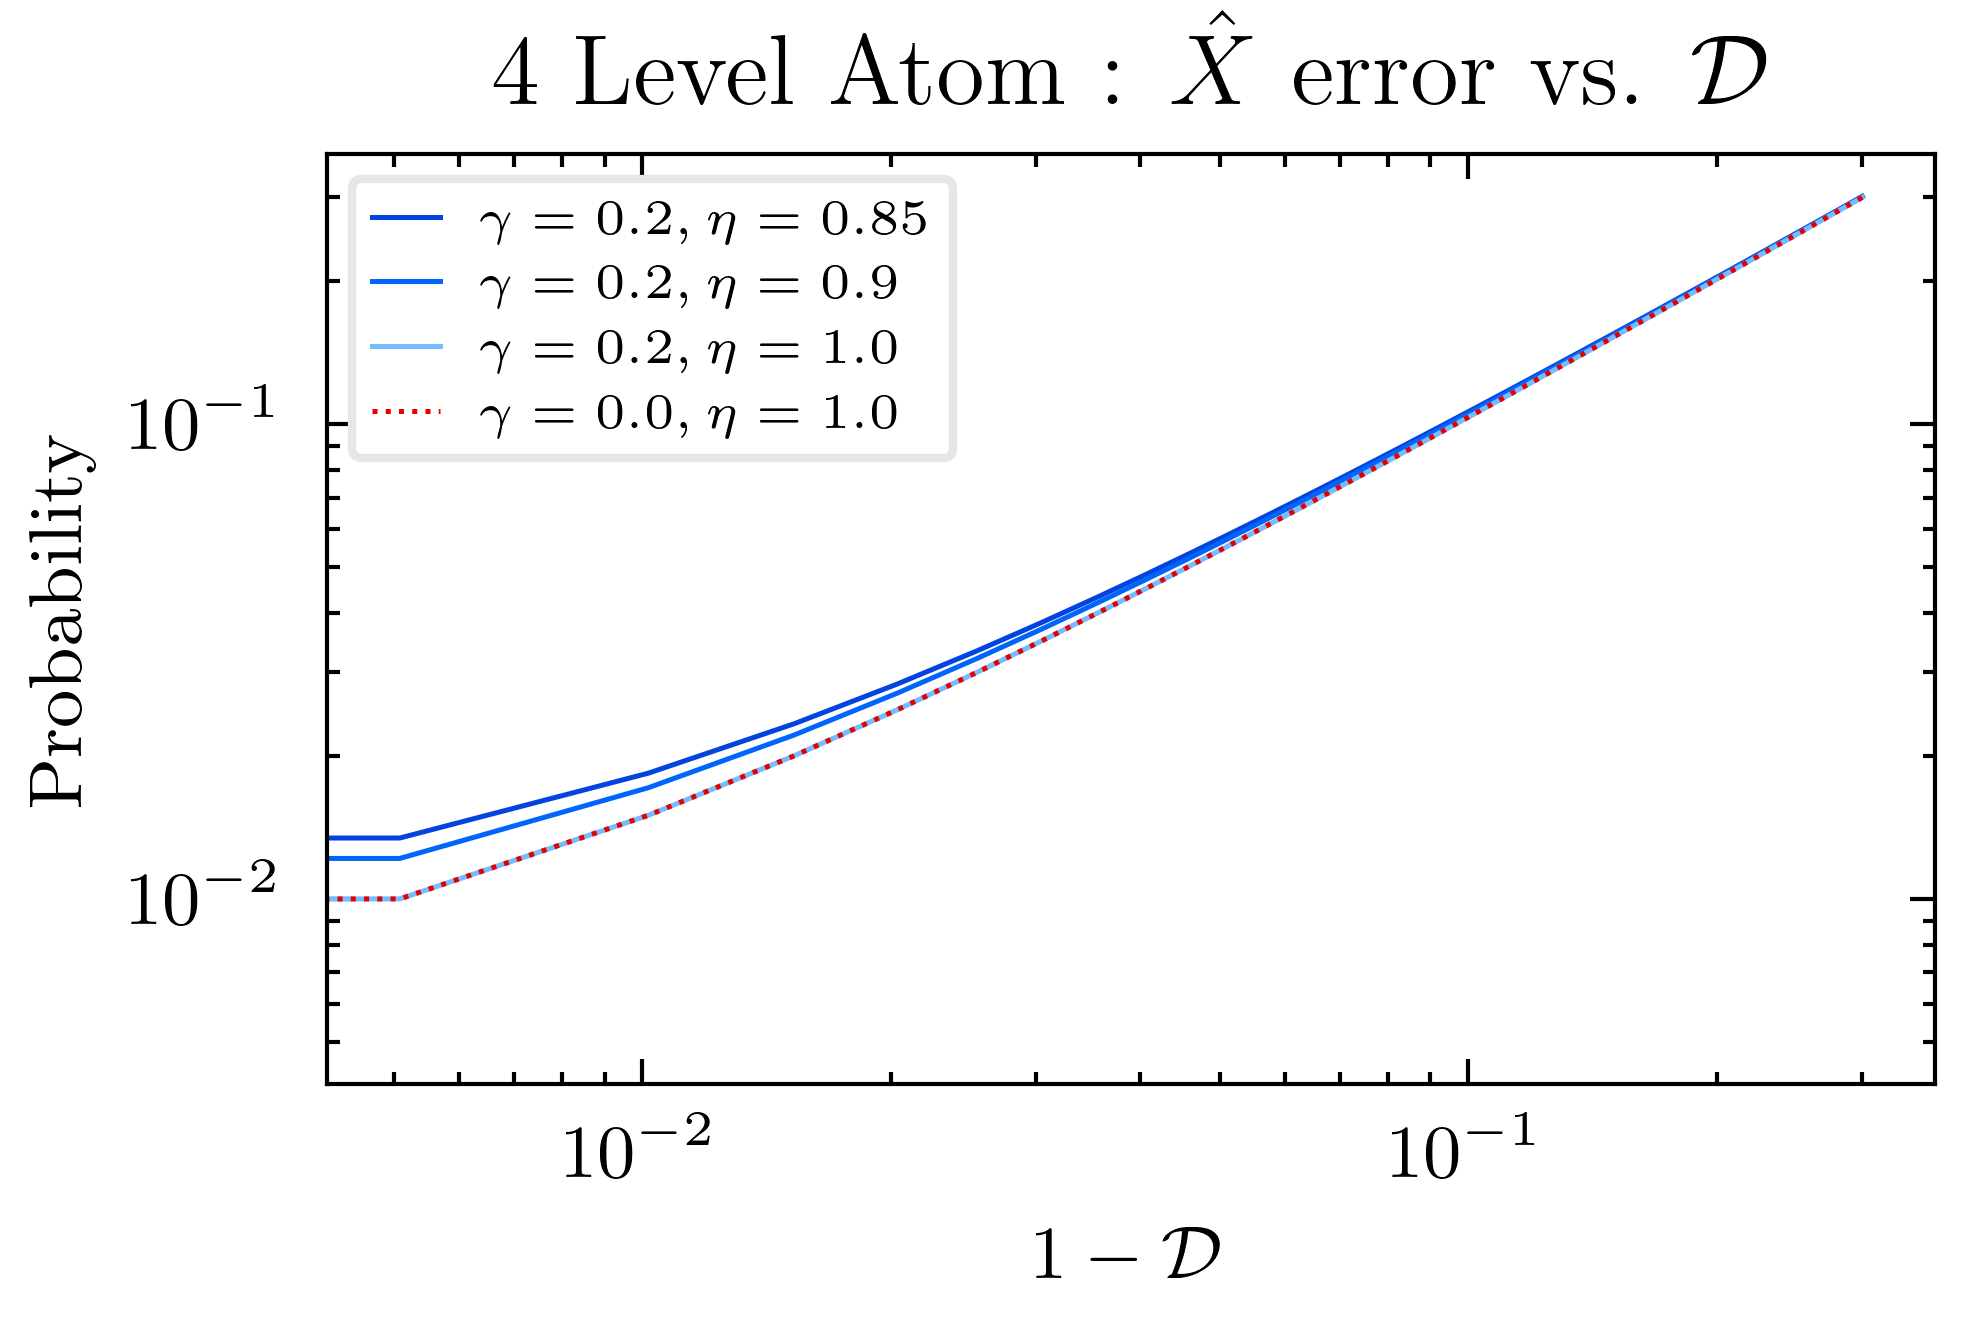

In [57]:
fig, p1 = plt.subplots(1,1)
# p1.plot(eta_list, px_eta_gamma0, label=r'$\gamma=0, \zeta=1$', linestyle='-', color='xkcd:green')
p1.plot(1- D_list, x85, label=r'$\gamma=0.2, \eta=0.85$', linestyle='-', color='xkcd:blue')
p1.plot(1- D_list, x90, label=r'$\gamma=0.2, \eta=0.9$', linestyle='-', color='xkcd:bright blue')
p1.plot(1- D_list, x10, label=r'$\gamma=0.2, \eta=1.0$' ,linestyle='-', color='xkcd:sky blue') 
# p.plot(eta_list, px_eta1, label=r'$\eta=1.0, \gamma=0$', linestyle='-', color='xkcd:green')
# p.plot(zeta_list, pz_zeta_eta1_gam1, label=r'$\eta=1.0, \gamma=0.1$', linestyle='-', color='xkcd:bright green')
# p1.plot(1- D_list, x85_1, label=r'$\gamma=0.1, \eta=0.85$', linestyle='-.', color='xkcd:blue')
# p1.plot(1- D_list, x90_1, label=r'$\gamma=0.1, \eta=0.9$', linestyle='-.', color='xkcd:bright blue')
# p1.plot(1- D_list, x10_1, label=r'$\gamma=0.1, \eta=1.0$', linestyle='-.', color='xkcd:sky blue')
p1.plot(1- D_list, x_perf, label=r'$\gamma=0.0, \eta=1.0$', linestyle=':', color='xkcd:red')
p1.set_yscale('log')
p1.set_xscale('log')
p1.set_xlabel(r'$1-\mathcal{D}$')
p1.set_ylabel('Probability')
p1.set_title(r'4 Level Atom : $\hat{X}$ error vs. $\mathcal{D}$')
p1.legend( frameon=True, edgecolor='0.9', prop={'size': 6})
# plt.show()
fig.savefig('stab_px_vs_D.png', bbox_inches='tight')

In [88]:
eta_list = np.linspace( 0.7, 0.9999, 500)
# eta_list = np.logspace(-0.0513,0,50)
# px_eta_gamma0 = []
# py_eta_gamma0 = []
px_eta_gamma1 = []
py_eta_gamma1 = []
px_eta_gammma15 = []
py_eta_gammma15 = []
# px_eta_gammma15zeta98 = []
# py_eta_gammma15zeta98 = []

for e in eta_list:
    # px, py = pauli_err_fusion(0, 1, e)[0:2]
    # px_eta_gamma0.append(px)
    # py_eta_gamma0.append(py)
    px, py = pauli_err_fusion(0.1, 1, e)[0:2]
    px_eta_gamma1.append(px)
    py_eta_gamma1.append(py)
    px, py = pauli_err_fusion(0.15, 1, e)[0:2]
    px_eta_gammma15.append(px)
    py_eta_gammma15.append(py)



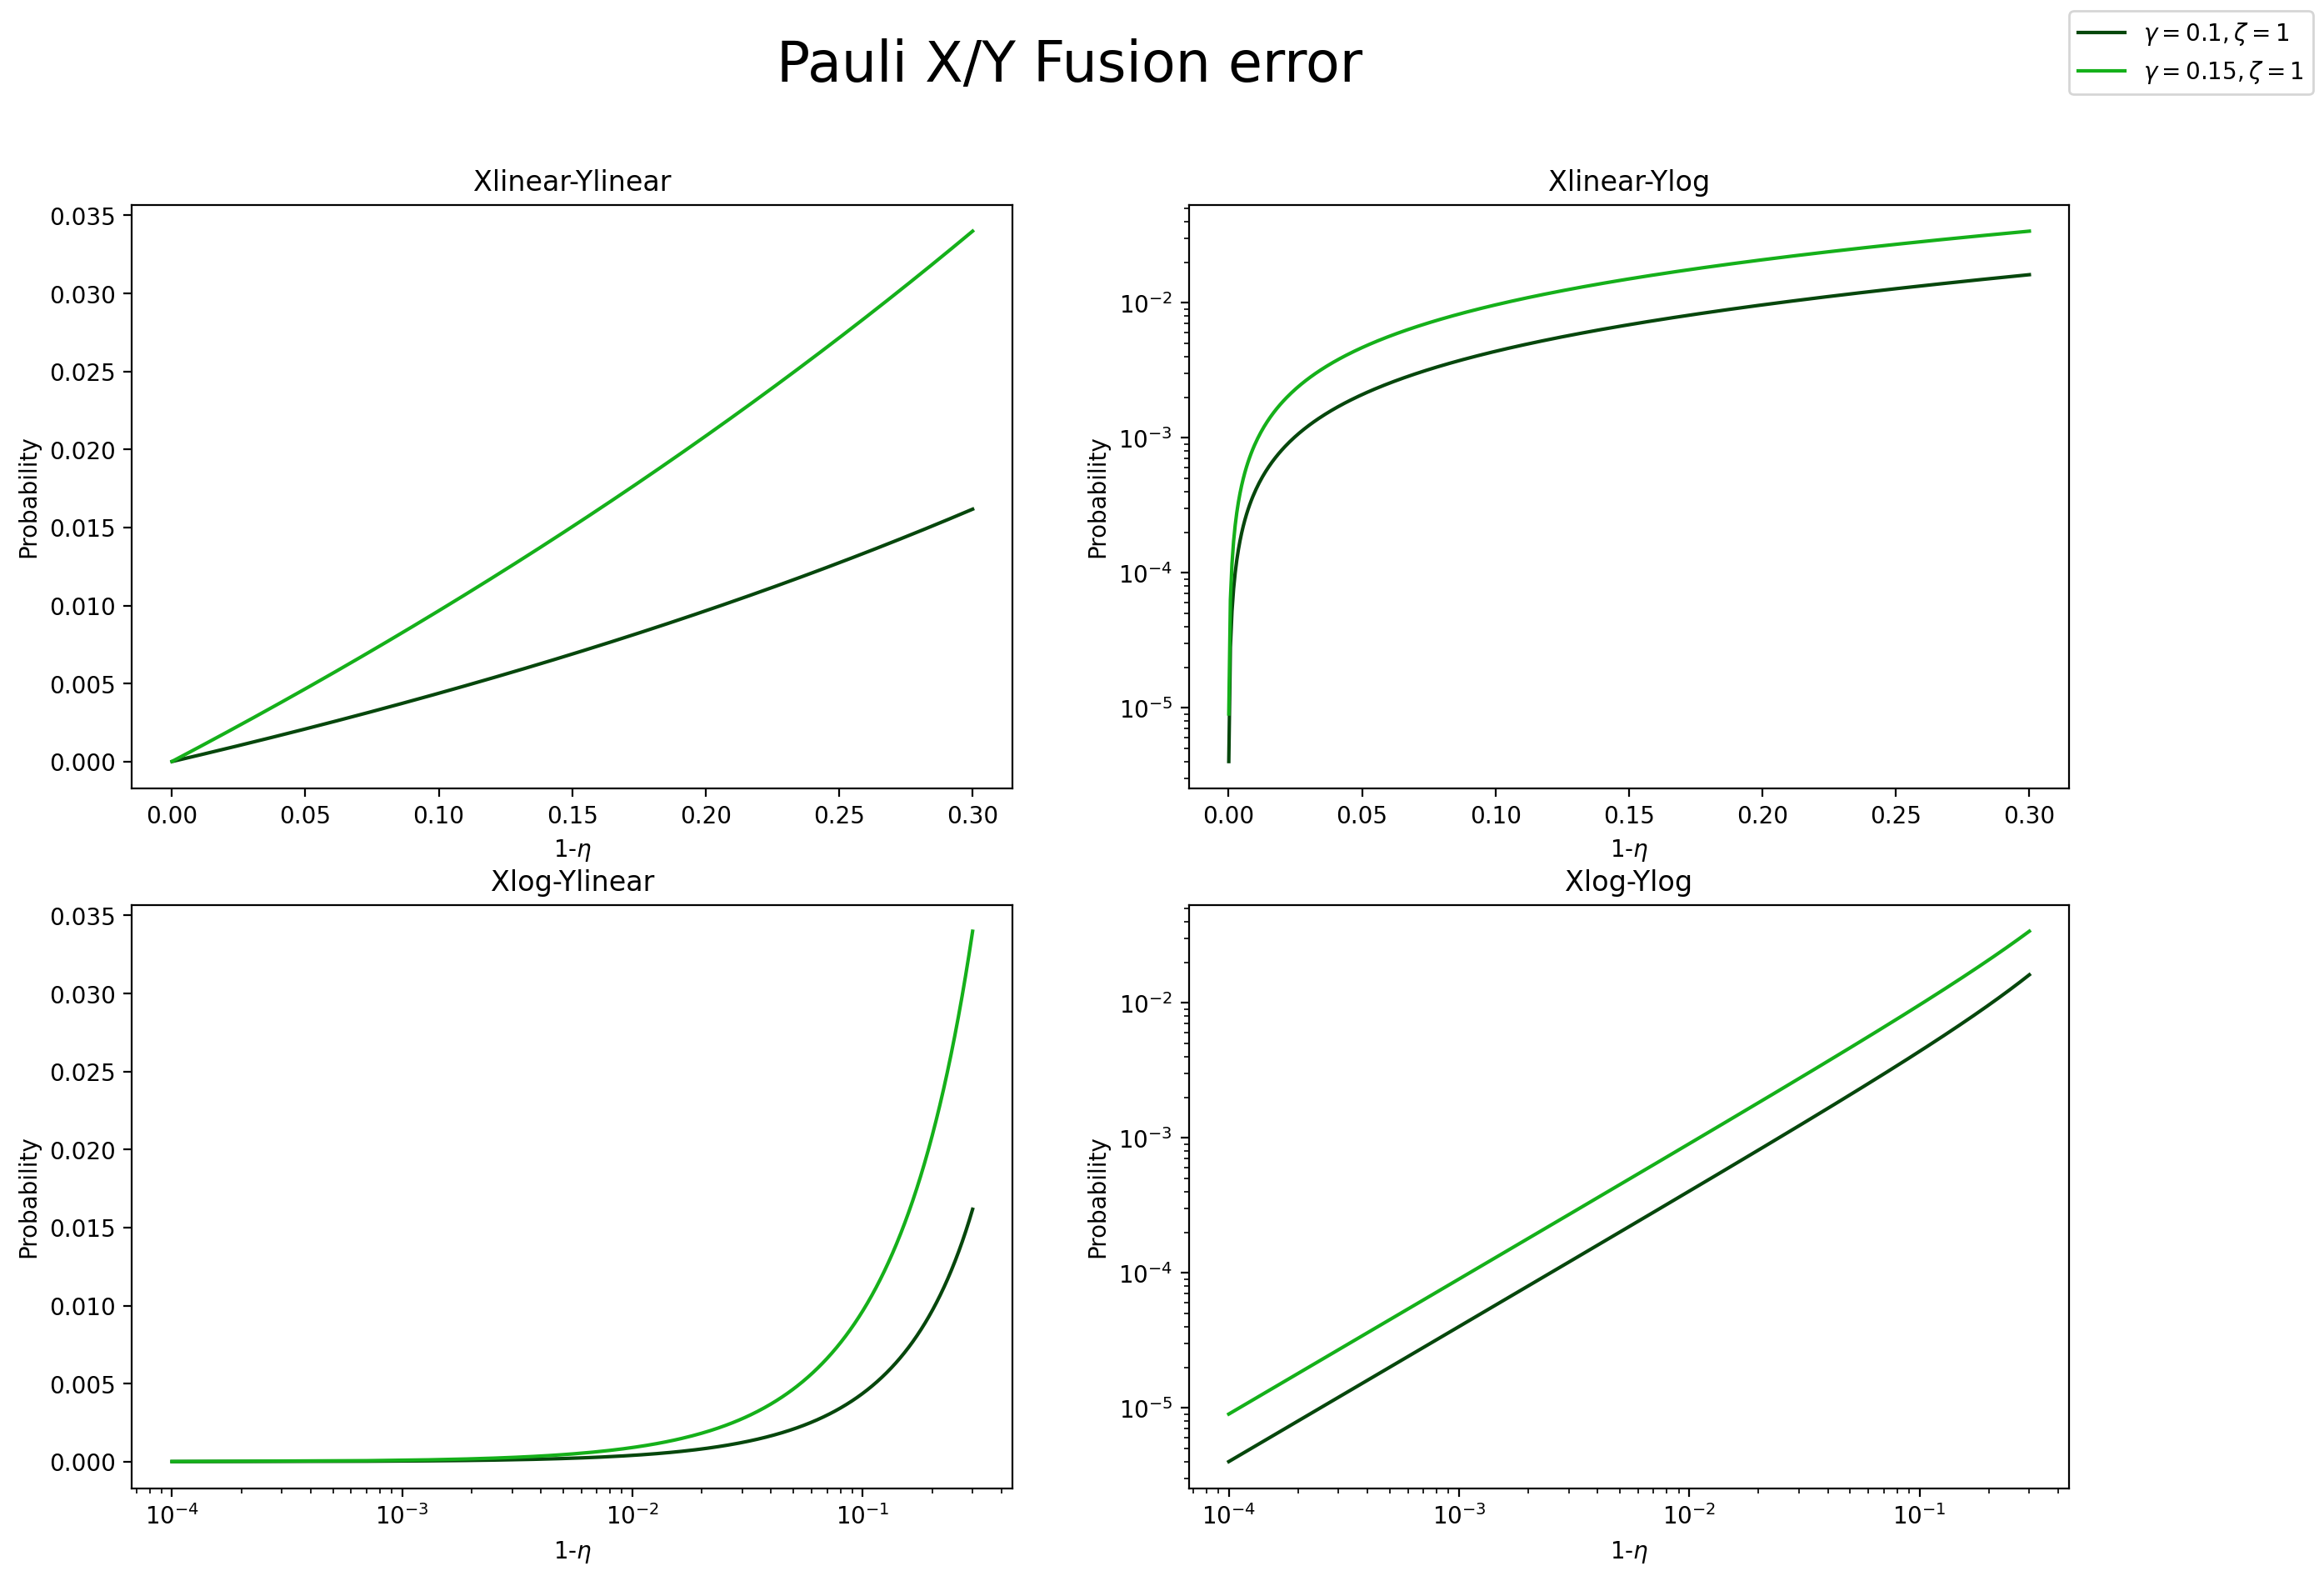

In [91]:
plt.style.use('default')
fig, p = plt.subplots(2,2, figsize = (15,10))
# print(p)
p[0,0].set_title('Xlinear-Ylinear')
p[0,1].set_title('Xlinear-Ylog')
p[0,1].set_yscale('log')
p[1,0].set_title('Xlog-Ylinear')
p[1,0].set_xscale('log')
p[1,1].set_title('Xlog-Ylog')
p[1,1].set_yscale('log')
p[1,1].set_xscale('log')
for i in range(2):
    for j in range(2):
        p[i,j].plot(1-eta_list, px_eta_gamma1, label=r'$\gamma=0.1, \zeta=1$', linestyle='-', color='xkcd:forest green')
        p[i,j].plot(1-eta_list, px_eta_gammma15, label=r'$\gamma=0.15, \zeta=1$', linestyle='-', color='xkcd:green')
        p[i,j].set_xlabel(r'1-$\eta$')
        p[i,j].set_ylabel('Probability')

handles, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.suptitle('Pauli X/Y Fusion error', fontsize=24)
fig.savefig('fusion_px_vs_eta_logstest.png')

# 3-level

## Z error

## X/Y error

# 4-Level 